In [1]:
import datetime as dt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [6]:
 from mpl_finance import candlestick_ohlc

In [2]:
style.use('ggplot')

In [10]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016, 12, 13)

In [11]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [12]:
df.to_csv('tsla.csv ')

In [13]:
df = pd.read_csv('tsla.csv', parse_dates = True , index_col = 0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


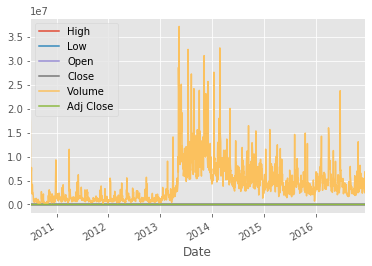

In [14]:
df.plot()
# mplcursors.cursor(hover=True)

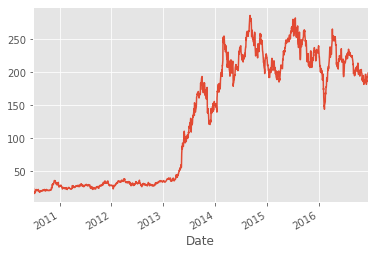

In [15]:
df['Adj Close'].plot()

In [16]:
df['100ma'] = df['Adj Close'].rolling(window = 100).mean()

In [17]:
df.head() # head will not be populated because there is no previous 100 records to find the mean

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,NaN


In [18]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-12-08,192.500000,189.539993,192.050003,192.289993,3194100,192.289993,205.469100
2016-12-09,193.839996,190.809998,190.869995,192.179993,2722500,192.179993,205.107300
2016-12-12,194.419998,191.179993,192.800003,192.429993,2438900,192.429993,204.826600
2016-12-13,201.279999,193.000000,193.179993,198.149994,6823900,198.149994,204.585399
2016-12-14,203.000000,196.759995,198.740005,198.690002,4150900,198.690002,204.272200


In [19]:
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


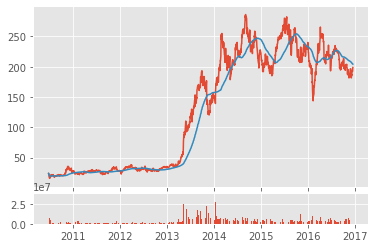

In [20]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [21]:
# Resampling the data
#ohlc - open high low close

In [22]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [23]:
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64

In [24]:
# we can get the contents of df by df.values, but this 
# doesn't give the columns or the index, so
# we want to reset the index so that we can get date as a column

In [25]:
df_ohlc.reset_index(inplace = True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [26]:
#converting the date to mdate
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

In [27]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


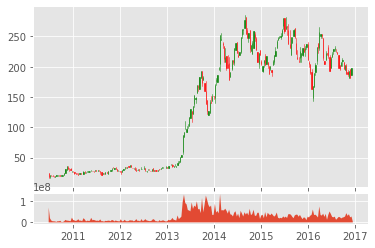

In [30]:
# %matplotlib notebook  
# import matplotlib.pyplot as plt
# %matplotlib notebook
# import mpld3
# mpld3.enable_notebook()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
# fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig('candlesticks.png')
plt.show()